In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv("Super_Hero_Dataset.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") # imports the dataset
# Create a new variable called 'header' from the first row of the dataset
# This calls the first row for the header
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
df.head(60)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1,3D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...","As 3-D Man, Chuck Chandler possessed approxima...",85,30,60,60,...,0,0,0,0,0,1,0,0,0,1
2,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,Enhanced Strength: 514A demonstrated great str...,100,20,30,50,...,0,0,0,0,1,0,1,0,0,1
3,A.I.M. Agent,NaN,NaN,7,A.I.M. agents are both soldiers and scientists...,NaN,90,5,20,25,...,0,0,1,0,0,0,0,0,0,0
4,A.M.A.Z.O. (CW),NaN,NaN,22,"The Anti Metahuman Adaptive Zootomic Organism,...","With its metallic body, it easily overpowered ...",90,100,100,100,...,1,0,1,0,0,0,0,0,0,0
5,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0,0,0,0,0,0,0,0,0,0
6,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0,0,1,0,0,0,0,0,0,0
7,Aayla Secura,Aayla Secura,NaN,8,ayla Secura was a Rutian Twi'lek Jedi Knight (...,NaN,90,40,45,55,...,0,1,0,0,0,0,0,0,1,0
8,Abe Sapien,Abraham Sapien,Abraham Sapien,10,"Sapien began life as Langdon Everett Caul, a ...",Abe is a humanoid amphibious creature. He has...,95,30,35,65,...,0,1,1,1,1,0,1,1,1,1
9,Abin Sur,NaN,NaN,9,Originally a history professor on the planet ...,Abin Sur possessed an exceptionally strong s...,75,90,55,65,...,0,0,0,0,0,0,0,0,0,0
10,ABomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0,1,0,0,1,1,1,1,1,1


In [3]:
# changes all the ability variables to a numeric type from an object type. 
df['intelligence_score'] = pd.to_numeric(df['intelligence_score'], errors='coerce')
df['strength_score'] = pd.to_numeric(df['strength_score'], errors='coerce')
df['speed_score'] = pd.to_numeric(df['speed_score'], errors='coerce')
df['durability_score'] = pd.to_numeric(df['durability_score'], errors='coerce')
df['power_score'] = pd.to_numeric(df['power_score'], errors='coerce')
df['combat_score'] = pd.to_numeric(df['combat_score'], errors='coerce')

In [4]:
df['attribute_score'] = df.apply(lambda x: x['intelligence_score'] + x['strength_score']+ x['speed_score']+ x['durability_score'] + x['power_score']+ x['combat_score'], axis=1)



In [5]:
df1 = df[['name','attribute_score','overall_score','has_agility','has_stealth','has_energy_absorption','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']]




In [6]:
df1.head(5)

,name,attribute_score,overall_score,has_agility,has_stealth,has_energy_absorption,has_super_strength,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
1,3D Man,345,6,0,0,0,1,85,30,60,60,40,70
2,514A (Gotham),335,10,0,0,0,1,100,20,30,50,35,100
3,A.I.M. Agent,235,7,0,1,0,0,90,5,20,25,25,70
4,A.M.A.Z.O. (CW),590,22,0,0,1,0,90,100,100,100,100,100
5,Aa,385,12,0,0,1,0,80,50,55,45,100,55


In [7]:
df1.dtypes

0
name                     object
attribute_score           int64
overall_score            object
has_agility              object
has_stealth              object
has_energy_absorption    object
has_super_strength       object
intelligence_score        int64
strength_score            int64
speed_score               int64
durability_score          int64
power_score               int64
combat_score              int64
dtype: object

In [8]:
df1['intelligence_score'] = pd.to_numeric(df1['intelligence_score'].astype('float32'))
df1['strength_score'] = pd.to_numeric(df1['strength_score'].astype('float32'))
df1['speed_score'] = pd.to_numeric(df1['speed_score'].astype('float32'))
df1['durability_score'] = pd.to_numeric(df1['durability_score'].astype('float32'))
df1['power_score'] = pd.to_numeric(df1['power_score'].astype('float32'))
df1['combat_score'] = pd.to_numeric(df1['combat_score'].astype('float32'))
df1['overall_score'] = pd.to_numeric(df1['overall_score'].astype('float32'))
df1['attribute_score'] = pd.to_numeric(df1['attribute_score'].astype('float32'))

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [9]:
df1.dtypes

0
name                      object
attribute_score          float32
overall_score            float32
has_agility               object
has_stealth               object
has_energy_absorption     object
has_super_strength        object
intelligence_score       float32
strength_score           float32
speed_score              float32
durability_score         float32
power_score              float32
combat_score             float32
dtype: object

In [10]:
col_names = ['name','overall_score','has_agility','has_stealth','has_energy_absorption','has_super_strength', 'intelligence_score', 'strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']



In [30]:
main_columns = ['intelligence_score', 'attribute_score','strength_score', 'speed_score', 'durability_score','power_score', 'combat_score']
X = df1[main_columns] # main data
y = df1.has_energy_absorption # Target variable





In [31]:
df1.shape

(1362, 13)

In [32]:
#df1.isna

In [33]:
df1.dropna(thresh=2)

,name,attribute_score,overall_score,has_agility,has_stealth,has_energy_absorption,has_super_strength,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
1,3D Man,345.0,6.0,0,0,0,1,85.0,30.0,60.0,60.0,40.0,70.0
2,514A (Gotham),335.0,10.0,0,0,0,1,100.0,20.0,30.0,50.0,35.0,100.0
3,A.I.M. Agent,235.0,7.0,0,1,0,0,90.0,5.0,20.0,25.0,25.0,70.0
4,A.M.A.Z.O. (CW),590.0,22.0,0,0,1,0,90.0,100.0,100.0,100.0,100.0,100.0
5,Aa,385.0,12.0,0,0,1,0,80.0,50.0,55.0,45.0,100.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Zane,445.0,25.0,1,1,0,1,100.0,35.0,50.0,60.0,100.0,100.0
1359,Zatanna,310.0,10.0,0,0,0,0,90.0,10.0,25.0,30.0,100.0,55.0
1360,Zoom,345.0,9.0,0,0,0,0,75.0,10.0,100.0,30.0,100.0,30.0
1361,Zoom (New 52),500.0,20.0,1,0,0,1,95.0,50.0,100.0,75.0,100.0,80.0


In [34]:
df1.head(25)

,name,attribute_score,overall_score,has_agility,has_stealth,has_energy_absorption,has_super_strength,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
1,3D Man,345.0,6.0,0,0,0,1,85.0,30.0,60.0,60.0,40.0,70.0
2,514A (Gotham),335.0,10.0,0,0,0,1,100.0,20.0,30.0,50.0,35.0,100.0
3,A.I.M. Agent,235.0,7.0,0,1,0,0,90.0,5.0,20.0,25.0,25.0,70.0
4,A.M.A.Z.O. (CW),590.0,22.0,0,0,1,0,90.0,100.0,100.0,100.0,100.0,100.0
5,Aa,385.0,12.0,0,0,1,0,80.0,50.0,55.0,45.0,100.0,55.0
6,Aaron Cash,235.0,5.0,0,0,0,0,80.0,10.0,25.0,40.0,30.0,50.0
7,Aayla Secura,370.0,8.0,1,0,0,0,90.0,40.0,45.0,55.0,55.0,85.0
8,Abe Sapien,410.0,10.0,1,0,0,1,95.0,30.0,35.0,65.0,100.0,85.0
9,Abin Sur,450.0,9.0,0,0,0,0,75.0,90.0,55.0,65.0,100.0,65.0
10,ABomb,540.0,20.0,1,1,0,1,80.0,100.0,80.0,100.0,100.0,80.0


In [35]:
df1.tail(25)

,name,attribute_score,overall_score,has_agility,has_stealth,has_energy_absorption,has_super_strength,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
1338,Wonder Man,465.0,13.0,0,0,0,1,90.0,100.0,55.0,90.0,65.0,65.0
1339,Wonder Woman (GAM),535.0,19.0,0,0,0,1,100.0,100.0,70.0,65.0,100.0,100.0
1340,Wonder Woman (Kingdom Come),575.0,23.0,0,1,0,1,95.0,100.0,80.0,100.0,100.0,100.0
1341,Wong (MCU),385.0,7.0,0,0,0,0,70.0,60.0,40.0,45.0,100.0,70.0
1342,World Breaker Hulk,555.0,37.0,1,0,1,1,85.0,100.0,85.0,100.0,100.0,85.0
1343,Wotan,345.0,28.0,0,0,0,0,85.0,15.0,20.0,65.0,100.0,60.0
1344,Wu,495.0,18.0,1,1,1,0,100.0,70.0,55.0,70.0,100.0,100.0
1345,X23,405.0,8.0,1,1,0,1,90.0,25.0,40.0,100.0,55.0,95.0
1346,X23 (FOX),475.0,9.0,1,0,0,1,90.0,65.0,70.0,85.0,85.0,80.0
1347,XMan,485.0,13.0,0,0,0,0,95.0,55.0,55.0,95.0,100.0,85.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=1000)

In [37]:
classifier = DecisionTreeClassifier(max_depth=4) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.848


In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[812  39]
 [113  36]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       851
           1       0.48      0.24      0.32       149

    accuracy                           0.85      1000
   macro avg       0.68      0.60      0.62      1000
weighted avg       0.82      0.85      0.83      1000



[Text(1162.5, 2038.5, 'attribute_score <= 477.5\ngini = 0.218\nsamples = 362\nvalue = [317, 45]'),
 Text(581.25, 1585.5, 'speed_score <= 37.5\ngini = 0.116\nsamples = 290\nvalue = [272, 18]'),
 Text(290.625, 1132.5, 'combat_score <= 45.0\ngini = 0.045\nsamples = 174\nvalue = [170, 4]'),
 Text(145.3125, 679.5, 'durability_score <= 95.0\ngini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(72.65625, 226.5, 'gini = 0.074\nsamples = 52\nvalue = [50, 2]'),
 Text(217.96875, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(435.9375, 679.5, 'intelligence_score <= 77.5\ngini = 0.016\nsamples = 121\nvalue = [120, 1]'),
 Text(363.28125, 226.5, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(508.59375, 226.5, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(871.875, 1132.5, 'power_score <= 92.5\ngini = 0.212\nsamples = 116\nvalue = [102, 14]'),
 Text(726.5625, 679.5, 'speed_score <= 62.5\ngini = 0.123\nsamples = 76\nvalue = [71, 5]'),
 Text(653.90625, 226.5, 'gini = 0.071\nsamples

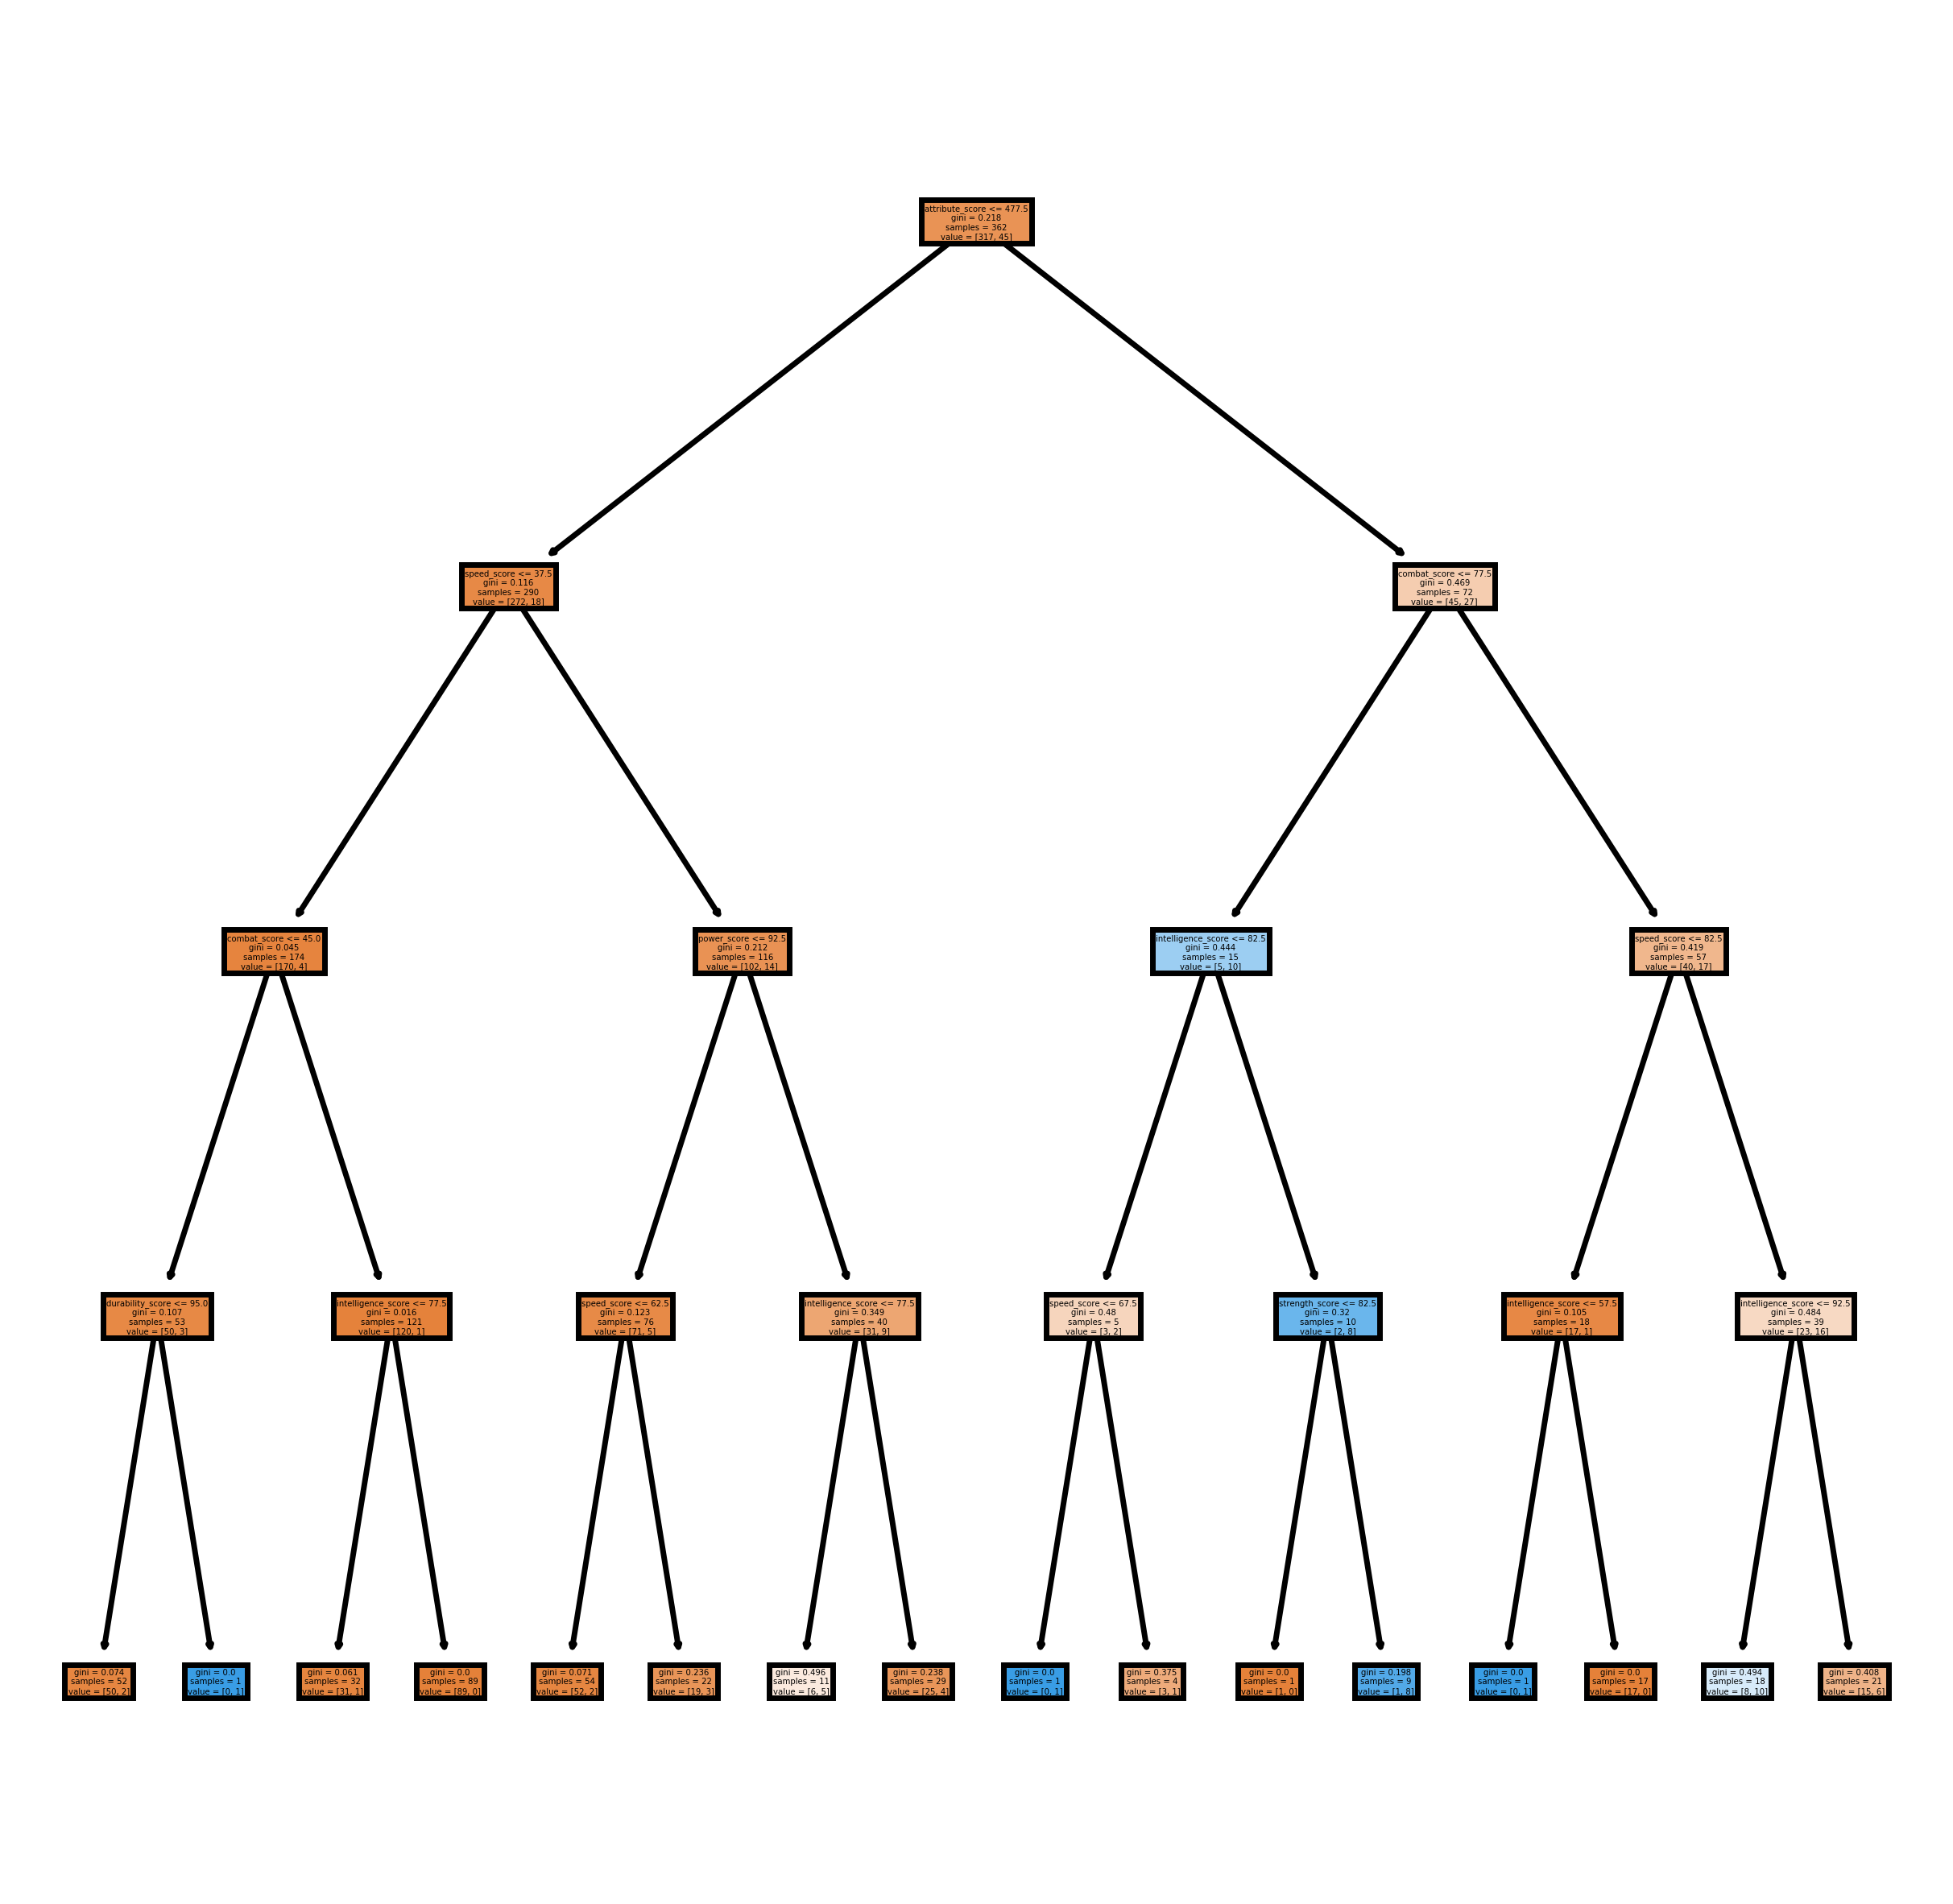

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=True) # plots the tree 